In [1]:
import pandas as pd
import numpy as np

In [2]:
wine_train = pd.read_csv("train.csv")

In [3]:
wine_train

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.20,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.30,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.10,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.87,0.22,2.60,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.36,0.30,2.30,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,2051,6.6,0.31,0.13,2.00,0.056,29.0,42.0,0.99388,3.52,0.87,12.0,7
2052,2052,9.7,0.59,0.21,1.80,0.079,27.0,65.0,0.99745,3.14,0.58,9.4,5
2053,2053,7.7,0.43,0.42,1.70,0.071,19.0,37.0,0.99258,3.32,0.77,12.5,8
2054,2054,9.1,0.50,0.00,1.75,0.058,5.0,13.0,0.99670,3.22,0.42,9.5,5


In [4]:
wine_train.shape

(2056, 13)

In [5]:
wine_train.dtypes

Id                        int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
wine_train["quality"].value_counts()

5    839
6    778
7    333
4     55
8     39
3     12
Name: quality, dtype: int64

In [7]:
wine_train = wine_train.astype({"Id":"category","quality":"category"})

In [8]:
wine_train = wine_train.drop(["Id"],axis = 1)

In [9]:
wine_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.0,0.50,0.39,2.20,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,9.3,0.30,0.73,2.30,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,7.1,0.51,0.03,2.10,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,8.1,0.87,0.22,2.60,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,8.5,0.36,0.30,2.30,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2051,6.6,0.31,0.13,2.00,0.056,29.0,42.0,0.99388,3.52,0.87,12.0,7
2052,9.7,0.59,0.21,1.80,0.079,27.0,65.0,0.99745,3.14,0.58,9.4,5
2053,7.7,0.43,0.42,1.70,0.071,19.0,37.0,0.99258,3.32,0.77,12.5,8
2054,9.1,0.50,0.00,1.75,0.058,5.0,13.0,0.99670,3.22,0.42,9.5,5


In [10]:
wine_train.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
wine_train.duplicated().sum()

0

In [12]:
wine_train.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,2056.0,8.365175,1.705390,5.00000,7.2000,7.9500,9.2000,15.90000
volatile acidity,2056.0,0.527601,0.173164,0.18000,0.3900,0.5200,0.6400,1.58000
citric acid,2056.0,0.265058,0.188267,0.00000,0.0900,0.2500,0.4200,0.76000
residual sugar,2056.0,2.398881,0.858824,1.20000,1.9000,2.2000,2.6000,14.00000
chlorides,2056.0,0.081856,0.023729,0.01200,0.0710,0.0790,0.0900,0.41400
free sulfur dioxide,2056.0,16.955982,10.009710,1.00000,8.0000,16.0000,24.0000,68.00000
total sulfur dioxide,2056.0,49.236868,32.961141,7.00000,22.0000,44.0000,65.0000,289.00000
density,2056.0,0.996748,0.001827,0.99007,0.9956,0.9967,0.9978,1.00369
pH,2056.0,3.310569,0.142321,2.74000,3.2000,3.3100,3.3900,3.78000
sulphates,2056.0,0.641308,0.137942,0.39000,0.5500,0.6100,0.7200,1.95000


In [13]:
import seaborn as sns

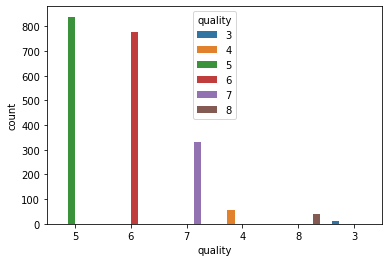

In [14]:
sns.countplot(x='quality', hue='quality', data=wine_train,order=wine_train['quality'].value_counts(ascending=False).index,)

In [15]:
num_cols = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]

In [16]:
# detecting ouliers for all before removing 
Q1 = wine_train[num_cols].quantile(0.25)
Q3 = wine_train[num_cols].quantile(0.75)
IQR = Q3-Q1

detected_outliers = ((wine_train[num_cols]<(Q1- 1.5*IQR)) | (wine_train[num_cols]>(Q3+ 1.5*IQR))).sum()
detected_outliers

fixed acidity            80
volatile acidity         15
citric acid               0
residual sugar          120
chlorides                74
free sulfur dioxide       9
total sulfur dioxide     56
density                  53
pH                       24
sulphates                40
alcohol                  13
dtype: int64

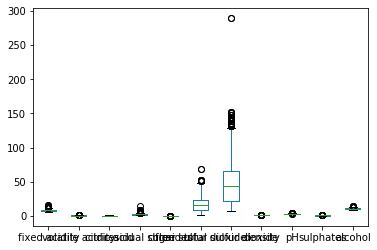

In [17]:
#boxplot for all the numerical attributes in dataframe (other type)
wine_train.boxplot(num_cols, grid = False)

In [18]:
X = wine_train.drop(["quality"],axis =1)
y = wine_train["quality"]

In [19]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,8.0,0.50,0.39,2.20,0.073,30.0,39.0,0.99572,3.33,0.77,12.1
1,9.3,0.30,0.73,2.30,0.092,30.0,67.0,0.99854,3.32,0.67,12.8
2,7.1,0.51,0.03,2.10,0.059,3.0,12.0,0.99660,3.52,0.73,11.3
3,8.1,0.87,0.22,2.60,0.084,11.0,65.0,0.99730,3.20,0.53,9.8
4,8.5,0.36,0.30,2.30,0.079,10.0,45.0,0.99444,3.20,1.36,9.5
...,...,...,...,...,...,...,...,...,...,...,...
2051,6.6,0.31,0.13,2.00,0.056,29.0,42.0,0.99388,3.52,0.87,12.0
2052,9.7,0.59,0.21,1.80,0.079,27.0,65.0,0.99745,3.14,0.58,9.4
2053,7.7,0.43,0.42,1.70,0.071,19.0,37.0,0.99258,3.32,0.77,12.5
2054,9.1,0.50,0.00,1.75,0.058,5.0,13.0,0.99670,3.22,0.42,9.5


In [20]:
y

0       6
1       6
2       7
3       5
4       6
       ..
2051    7
2052    5
2053    8
2054    5
2055    7
Name: quality, Length: 2056, dtype: category
Categories (6, int64): [3, 4, 5, 6, 7, 8]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y, stratify = y,test_size=0.3,random_state=107)

In [22]:
print("X_train is:", X_train.shape)
print("X_val is:", X_val.shape)
print("X_train is:", y_train.shape)
print("X_val is:", y_val.shape)

X_train is: (1439, 11)
X_val is: (617, 11)
X_train is: (1439,)
X_val is: (617,)


In [23]:
X_train.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [24]:
X_val.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [25]:
y_train.isnull().sum()

0

In [26]:
y_val.isnull().sum()

0

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
# fitting the X_train[num_cols] in standardization model
scaler = StandardScaler()
scaler = scaler.fit(X_train[num_cols])

In [29]:
# fitting the X_train[num_cols] and X_test[num_cols] in standardization model
X_train_std = pd.DataFrame(scaler.transform(X_train[num_cols]), columns = X_train[num_cols].columns)
X_val_std = pd.DataFrame(scaler.transform(X_val[num_cols]), columns = X_val[num_cols].columns)

In [30]:
X_val_std

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.842064,-0.675402,1.195531,-0.118918,0.093637,1.824520,3.198896,0.448398,-0.700106,3.239693,-1.061115
1,-0.336375,0.408599,-1.365097,0.343419,-0.443013,1.925333,-0.027966,-0.790007,0.094700,-0.574277,0.394597
2,-0.748829,1.834915,-1.418444,-1.274759,-0.085246,-1.199883,-1.082901,0.069067,1.034016,-1.161042,-0.867020
3,-0.277453,-0.903613,-0.084783,-0.003333,-3.126264,-0.090935,1.151080,-0.193118,0.889506,0.672598,0.006407
4,-0.807751,2.433969,-1.418444,-0.003333,-1.069105,1.219639,-0.027966,-1.771805,0.383720,-1.161042,1.947356
...,...,...,...,...,...,...,...,...,...,...,...
612,-0.630985,0.636809,-0.404862,-0.465670,0.183079,0.211505,0.282309,0.336830,2.045588,-0.134204,-0.575878
613,-0.925594,0.237441,-0.618248,-0.928007,0.898613,0.715572,0.282309,-0.332578,0.744996,-0.354240,-0.575878
614,-0.689907,0.693862,-1.365097,0.227835,0.496125,2.530214,0.065117,0.113694,1.467547,0.525907,0.394597
615,-0.689907,0.551230,-0.778287,0.227835,0.988054,-0.292562,-0.741599,-0.483195,1.467547,0.379216,0.394597


In [31]:
final_X_train = X_train_std

In [32]:
final_X_val = X_val_std

In [33]:
final_X_train.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [34]:
final_X_val.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

## SVM

In [35]:
from sklearn.svm import SVC

In [36]:
# model building by SVM algorithm
svm_model = SVC(kernel="linear", C = 0.01)
svm_model = svm_model.fit(final_X_train,y_train)
svm_model

SVC(C=0.01, kernel='linear')

In [37]:
# predicting the y value for the train data
svm_model_y_train_preds = svm_model.predict(final_X_train)
svm_model_y_train_preds[0:10]

array([5, 6, 5, 5, 5, 5, 5, 5, 6, 5])

In [38]:
# predicting the y value for the val data
svm_model_y_val_preds = svm_model.predict(final_X_val)
svm_model_y_val_preds[0:10]

array([6, 6, 5, 6, 6, 6, 5, 5, 5, 5])

In [39]:
# import libraries of confusion_matrix and accuracy and recall
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score

In [40]:
# finding the confusion_matrix for y_train actuals and y_train_predicts
confusionmatrix = confusion_matrix(y_train,svm_model_y_train_preds)
confusionmatrix

array([[  0,   0,   5,   3,   0,   0],
       [  0,   0,  26,  13,   0,   0],
       [  0,   0, 471, 116,   0,   0],
       [  0,   0, 202, 343,   0,   0],
       [  0,   0,  37, 196,   0,   0],
       [  0,   0,   3,  24,   0,   0]])

In [41]:
# finding the confusion_matrix for y_test actuals and y_test_predicts
confusionmatrix = confusion_matrix(y_val,svm_model_y_val_preds)
confusionmatrix

array([[  0,   0,   3,   1,   0,   0],
       [  0,   0,  13,   3,   0,   0],
       [  0,   0, 187,  65,   0,   0],
       [  0,   0,  79, 154,   0,   0],
       [  0,   0,  12,  88,   0,   0],
       [  0,   0,   0,  12,   0,   0]])

In [42]:
# finding the accuracy for y_train_actuals and y_train_predicts
accuracy_score(y_train,svm_model_y_train_preds)

0.5656706045865184

In [43]:
# finding the accuracy for y_test_actuals and y_test_predicts
accuracy_score(y_val,svm_model_y_val_preds)

0.5526742301458671

In [44]:
import pickle

In [45]:
print('saving model as pkl file.......')
pickle.dump(svm_model, open('wine_quality.pkl','wb'))

saving model as pkl file.......
